# Exploratory Data Analysis of Google PlayStore Apps

# We are going to analyse the dataset(taken from Kaggle) of all the Apps in Google Play store

# 1.Importing the required packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#To hide Warning messages.
import warnings
warnings.filterwarnings('ignore')

# 2. Reading the data. 

In [2]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 3.Data Preprocessing

In [3]:
print(df.isnull().sum())

df.dropna(inplace=True) #Dropping Rows with Null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


There are many Null values in Rating ,Content Rating,current Ver,Android Ver

Removing Duplicate Entries

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(8886, 13)

After removing the rows with null values and duplicate entries.We have got 8886 apps to analyse for their rating and performance.

The Data Types of each feature

In [6]:
df.dtypes  # Displaying Data types of each feature.

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

The features Reviews must be numerical types so we would change it

In [7]:
df.Reviews = df.Reviews.astype('int64') #Changing to int type.

Other feature like Size,Installs,Price and Android ver also must be of numeric type

# Changing the Feautre- Installs

In [8]:
newInstalls = []

for row in df.Installs:
    
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
    

df.Installs = newInstalls

df.Installs.head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

# Changing the feature -Size

In [9]:
newSize = []

for row in df.Size:
    newrow = row[:-1]
    try:
        newSize.append(float(newrow))
    except:
        newSize.append(0) #When it says - Size Varies.
    
df.Size = newSize

df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

# Changing the feature -Price

In [10]:
newPrice = []

for row in df.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
df.Price = newPrice

df.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

# Changing the feature- Android version

In [11]:
newVer = []

for row in df['Android Ver']:
    try:
        newrow = float(row[:2])
    except:
        newrow = 0  # When the value is - Varies with device
    
    newVer.append(newrow)
    
df['Android Ver'] =  newVer

df['Android Ver'].value_counts()

4.0    5602
0.0    1178
2.0    1160
5.0     500
3.0     246
1.0     104
6.0      46
7.0      45
8.0       5
Name: Android Ver, dtype: int64

# 4.Analysing features:

4.1 Categories

In [12]:
df.Category.value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

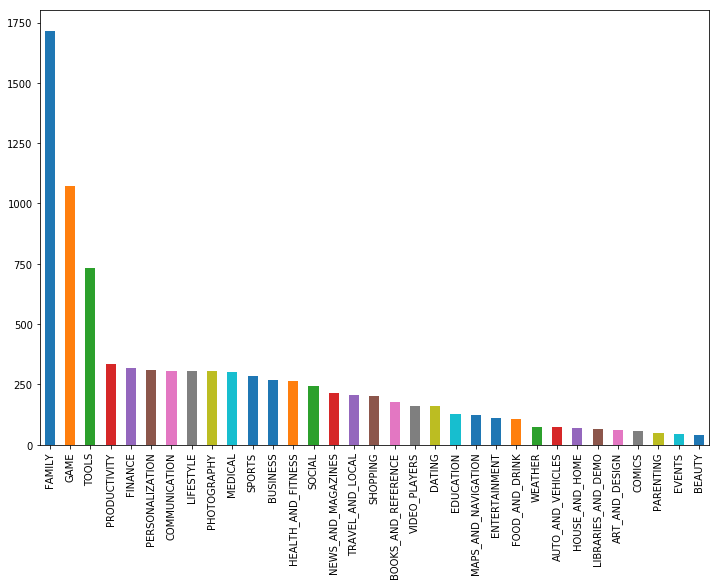

In [13]:
df.Category.value_counts().plot(kind='bar',figsize= (12,8))

4.2 rating

In [25]:
df.Category.value_counts()[]

1717

In [14]:
df.Rating.describe()

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

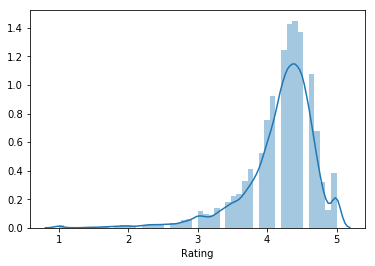

In [15]:
sns.distplot(df.Rating)

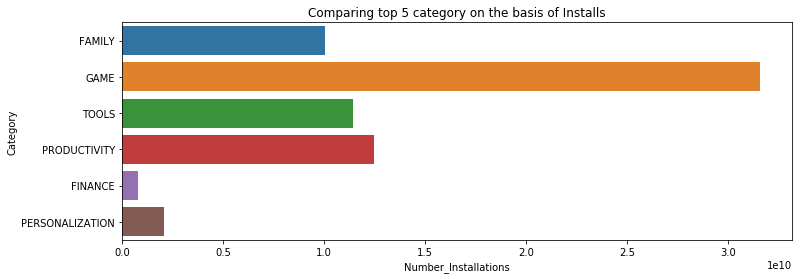

In [28]:
top_cat=df.groupby('Category').size().reset_index(name='Count').nlargest(6,'Count')
cat=top_cat.Category.tolist()
data_top6=df.groupby('Category')['Installs'].agg('sum').loc[cat].reset_index(name='Number_Installations')
data=df.groupby('Category')['Installs'].agg('sum').reset_index(name='Number_Installations')

#Comparing top 5 category on the basis of 'Installs'
def compare_6(data):
    fig = plt.figure(figsize=(12,4))
    title=plt.title('Comparing top 5 category on the basis of Installs')
    bar=sns.barplot(y=data['Category'],x=data['Number_Installations'])
    plt.show(bar)

#Comparing all categoryies on the basis of 'Installs'
def compare_all(data):
    fig = plt.figure(figsize=(12,7))
    title=plt.title('Comparing all categories on the basis of Installs')
    bar=sns.barplot(y=data['Category'],x=data['Number_Installations'])
    plt.show(bar)
    
compare_6(data_top6)

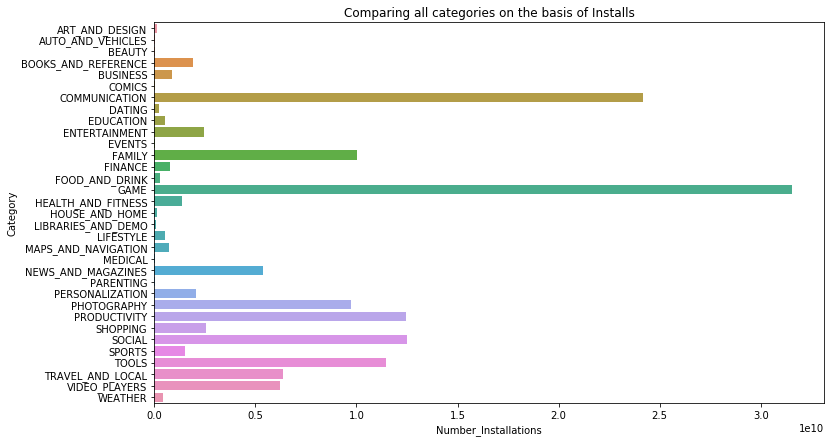

In [29]:
compare_all(data)